# **Enhancing Customer Satisfaction in the Refurbished Market Using  NLP Transformers Models**


## Project Overview
The global market for refurbished products is rapidly expanding due to the increasing demand for cost-effective and environmentally friendly options. Refurbished electronics play a crucial role in promoting sustainability and reducing electronic waste by giving devices a second life instead of contributing to landfills. This not only saves valuable resources but also reduces the carbon footprint associated with manufacturing new products. However, customer trust is fragile in this segment. Negative reviews, especially on product defects, can significantly undermine the perceived value and quality of refurbished items, leading to lost sales and high return rates. This project aims to be a critical decision-making tool for businesses operating in the refurbished product space.

According to a report by Allied Market Research (2023), the global refurbished electronics market is expected to grow from $50 billion in 2022 to over $100 billion by 2030, driven by increasing consumer demand for affordable, sustainable alternatives to new products.

To address these challenges, this project employs NLP models to automatically analyze customer feedback, extract key insights, and categorize complaints. By leveraging the power of Zero-Shot Classification and BART summarization, the project automates review analysis and provides businesses with actionable recommendations for quality assurance and customer support improvements.

## Importance of Quality Assurance in the Refurbished Market
In the refurbished market, quality assurance is paramount. Unlike new products, refurbished items have a higher potential for variability in quality. Ensuring non-defective products is crucial to:

* **Build customer trust:** Quality control can prevent negative reviews, boosting customer confidence and increasing the likelihood of repeat purchases.
* **Reduce return rates**: Addressing frequent defects helps minimize returns, saving costs associated with logistics and handling.
* **Enhance brand reputation:** Consistent product quality leads to positive word-of-mouth, fostering loyal customers and encouraging more environmentally conscious purchasing decisions.
* **Promote sustainability:** By extending the life of electronics through refurbishing, we contribute to a circular economy that prioritizes reuse over disposal, reducing electronic waste and conserving resources.
Analyzing detailed customer reviews allows us to pinpoint specific issues and offer targeted improvements, making this project a critical tool for driving both business success and environmental sustainability in the refurbished product space.



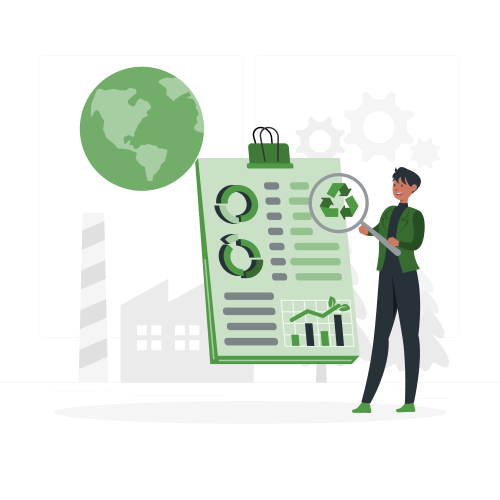

Citation:
Allied Market Research. (2023). Refurbished electronics market size, share, and industry trends analysis report. Retrieved from https://www.alliedmarketresearch.com# 

## Data Collection via Web Scraping


###  **Educational Purpose Disclaimer**
This project was carried out strictly for educational and research purposes as part of an academic exercise to demonstrate the use of Natural Language Processing (NLP) techniques in real-world applications. The data collection and analysis were conducted responsibly, with no intention of commercial use or financial gain. The insights derived are intended solely for academic exploration and learning, and no proprietary data was utilized or shared outside the scope of this educational project.

In [ ]:
#Import the neccesary libraries
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import re
import time

In [ ]:

#Initialize Selenium WebDriver
driver_path = "path/chromedriver.exe"  
service = Service(driver_path)

#Initialize Chrome Navigator
driver = webdriver.Chrome(service=service)

#URL for the e-commerce site
url = 'https://www.site.com.us/bestsellers/renewed/'

#Navigate to the website
driver.get(url)


In [ ]:
#Here we begin with the extraction of key features from each product

#initial wait for the page to load
time.sleep(5)

#Initialize an empty list for product data we are going to collect
product_data = []

#Process the top 20 products
for index in range(25):
    try:
        #Re-query products on each loop iteration to avoid not found element issues
        productos = driver.find_elements(By.CSS_SELECTOR, '#gridItemRoot')

        article_info = {}

        #Click on the product
        productos[index].click()
        time.sleep(5)

        #Extract product name with three methods
        try:
            #First attempt to extract product name
            name = driver.find_elements(By.XPATH, "/html/body/div[1]/div/div[10]/div[3]/div[4]/div[1]")[0].text
        except Exception as e1:
            try:
                #Second attempt to extract product name
                name = driver.find_elements(By.CSS_SELECTOR, "#titleSection")[0].text
            except Exception as e2:
                try:
                    #Third attempt to extract product name
                    name = driver.find_elements(By.CSS_SELECTOR, "#title")[0].text
                except Exception as e3:
                    name = 'Name not found'
                    print(f"Error finding product name: {e1}, {e2}, {e3}")

        article_info['name'] = name

        #Extract price with three methods
        try:
            price = driver.find_elements(By.XPATH, "/html/body/div[1]/div/div[10]/div[3]/div[4]/div[14]/div/div/div[1]/div[4]/div/table/tbody/tr/td[2]/span[1]")[0].text
        except Exception as e1:
            try:
                price = driver.find_elements(By.CSS_SELECTOR, "#corePrice_desktop > div > table > tbody > tr > td.a-span12 > span.a-price.a-text-price.a-size-medium.apexPriceToPay")[0].text
            except Exception as e2:
                try:
                    price = driver.find_elements(By.XPATH, "/html/body/div[2]/div/div[6]/div[3]/div[4]/div[12]/div/div[4]/div/table/tbody/tr/td[2]/span[1]")[0].text
                except Exception as e3:
                    price = 'Price not found'
                    print(f"Error finding price: {e1}, {e2}, {e3}")
        article_info['price'] = price

        #Extract rating with three methods
        try:
            rating = driver.find_elements(By.XPATH, "/html/body/div[1]/div/div[10]/div[3]/div[4]/div[3]/div/span[1]/span/span[1]")[0].text
        except Exception as e1:
            try:
                rating = driver.find_elements(By.CSS_SELECTOR, "#acrPopover")[0].text
            except Exception as e2:
                try:
                    rating = driver.find_elements(By.XPATH, "/html/body/div[2]/div/div[6]/div[27]/div/div/div/div/div[1]/span[1]/div/div/div/div/div/div[2]/div/div[2]/div/span/span")[0].text
                except Exception as e3:
                    rating = 'Rating not found'
                    print(f"Error finding rating: {e1}, {e2}, {e3}")
        article_info['rating'] = rating

        #click on one-star filter with four methods (worst customer reviews)
        try:
            driver.find_elements(By.XPATH, "/html/body/div[2]/div/div[6]/div[30]/div/div/div/div/div[1]/span[1]/div/div/div/div/div/div[4]/div/div/ul/li[5]/span/a/div[1]")[0].click()
            time.sleep(3)
        except Exception as e1:
            try:
                driver.find_elements(By.XPATH, "/html/body/div[2]/div/div[5]/div[33]/div/div/div/div/div[1]/span[1]/div/div/div/div/div/div[4]/div/div/ul/li[5]/span/a/div[1]")[0].click()
                time.sleep(3)
            except Exception as e2:
                try:
                    driver.find_elements(By.XPATH, "/html/body/div[2]/div/div[6]/div[30]/div/div/div/div/div[1]/span[1]/div/div/div/div/div/div[4]/div/div/ul/li[5]/span/a")[0].click()
                    time.sleep(3)
                except Exception as e3:
                    try:
                        driver.find_elements(By.CSS_SELECTOR, "#histogramTable > li:nth-child(5) > span > a > div:nth-child(2)")[0].click()
                        time.sleep(3)
                    except Exception as e4:
                        print(f"Error clicking one-star filter: {e1}, {e2}, {e3}, {e4}")

        #Extract reviews text with three methods
        try:
            reviews_text = driver.find_elements(By.CSS_SELECTOR, "#a-page > div:nth-child(28) > div > div.a-fixed-right-grid.view-point > div > div.a-fixed-right-grid-col.a-col-left > div.a-section.a-spacing-none.reviews-content.a-size-base > div.a-section.a-spacing-none.reviews-content.a-size-base")[0].text
        except Exception as e1:
            try:
                reviews_text = driver.find_elements(By.XPATH, '//*[@id="a-page"]/div[2]/div/div[1]/div/div[1]/div[5]')[0].text
            except Exception as e2:
                try:
                    reviews_text = driver.find_elements(By.XPATH, '/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]')[0].text
                except Exception as e3:
                    reviews_text = 'Reviews not found'
                    print(f"Error extracting reviews: {e1}, {e2}, {e3}")
        article_info['reviews'] = reviews_text

        product_data.append(article_info)

        #Go back to the products page for the most selling
        driver.back()
        time.sleep(3)
        driver.back()
        time.sleep(3)

    except Exception as e:
        print(f"Error processing product {index}: {e}")
        driver.back()
        time.sleep(3)
        driver.back()
        time.sleep(3)

#Lets save the extracted info in a pandas dataframe
df = pd.DataFrame(product_data)



Error finding product name: list index out of range, list index out of range, list index out of range
Error finding price: list index out of range, list index out of range, list index out of range
Error finding rating: list index out of range, list index out of range, list index out of range
Error clicking one-star filter: list index out of range, list index out of range, list index out of range, list index out of range
Error extracting reviews: list index out of range, list index out of range, list index out of range
Error processing product 7: list index out of range
Error clicking one-star filter: list index out of range, list index out of range, list index out of range, Message: element click intercepted: Element <div class="a-section a-spacing-none">...</div> is not clickable at point (161, 881). Other element would receive the click: <div id="rufus-peek-pills-container" class="rufus-peek-pills-container">...</div>
  (Session info: chrome=130.0.6723.70)
Stacktrace:
	GetHandleVerif

During the web scraping process, the script encountered various errors such as list index out of range and element click intercepted. These issues typically arise due to:

* Dynamic Web Elements: The structure of the webpage may change dynamically, causing certain elements (like product names or ratings) to be missing or loaded differently than expected.
* Variability in HTML Structure: Not all product pages have the same HTML layout, leading to missing elements or unexpected indices when trying to extract data.
* Interference from Pop-ups or Ads: Certain elements, like pop-ups or overlays, may block access to specific components of the webpage, resulting in "element click intercepted" errors.


To ensure the script continues running despite these issues, try-except statements were implemented. These error-handling mechanisms allowed the scraper to gracefully skip problematic items without interrupting the entire process. This approach was chosen to:

* Avoid Data Loss: Instead of terminating, the scraper continues to the next product, maximizing the amount of data collected.
* Improve Robustness: The use of try-except blocks makes the script more resilient to minor changes in the website's structure.

In [ ]:
#Lets take a look to the collected data
df

,name,price,rating,reviews
0,"Apple iPhone 12, 64GB, Black - Fully Unlocked ...",$274.00,4.1,From the United States\njohn c.\nRead before p...
1,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",$217.00,4.2,From the United States\nLady bug\nRefurbished ...
2,"Apple iPad (10.2-Inch, Wi-Fi, 32GB) - Space Gr...",$137.00,4.4,From the United States\nTania\nRun away and ne...
3,"Apple iPhone 13, 128GB, Midnight - Unlocked (R...",$402.00,4.1,From the United States\nAcashia Primous\nBewar...
4,"Apple iPhone 12 Mini, 64GB, Blue - Unlocked (R...",$311.76,4.0,From the United States\nAE Hamilton\nI'm very ...
5,"Apple iPhone 14, 128GB, Midnight - Unlocked (R...",$457.00,4.1,From the United States\nAnother Amazon Reviewe...
6,Name not found,Price not found,Rating not found,Reviews not found
7,"Apple iPhone XR, 64GB, Black - Unlocked (Renewed)",$176.00,4.4,Reviews not found
8,"Apple iPhone SE 2nd Generation, US Version, 64...",$156.86,4.2,From the United States\nPhilip\nFaulty Lightni...
9,Name not found,Price not found,Rating not found,Reviews not found


In [ ]:
#End our session
driver.quit()

In [ ]:
#Lets save the extracted data on a csv
reviews_data = df.to_csv('reviews_data_ws.csv')

## Data Preprocessing and Wrangling

In [2]:
pd.set_option("display.max_colwidth", 500)
import warnings
warnings.filterwarnings("ignore")

#First lets read the extracted info this was prevously saved to assure the information extracted wasn't lost
collected_data = pd.read_csv('reviews_data_ws.csv', index_col=0)

model_data = collected_data.copy()

model_data.head(3)

,name,price,rating,reviews
0,"Apple iPhone 12, 64GB, Black - Fully Unlocked (Renewed)",$274.00,4.1,"From the United States\njohn c.\nRead before purchasing!!\nReviewed in the United States on September 9, 2024\nSize: 64GBColor: WhiteService Provider: UnlockedProduct grade: Renewed PremiumVerified Purchase\nShort version: they can sell you a phone that is still connected to a previous carrier and you will have to return it.\n\nLong version:\nPhone gets delivered. Yay new phone. In great condition. Move all my information to new phone. Thank god I didn’t remove everything from old phone. Pro..."
1,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",$217.00,4.2,"From the United States\nLady bug\nRefurbished phone that doesn’t work, shuts down with battery fully charged\nReviewed in the United States on August 1, 2024\nSize: 64GBColor: WhiteService Provider: UnlockedProduct grade: RenewedVerified Purchase\nAVOID THIS SELLER. TAKE MY WORD FOR IT SAVE YOURSELF ALL A LOT OF TROUBLE. Seller sold me a defective phone that can’t be used because it powers itself off with a full battery 5 min into a telephone call or searching something on the internet- it p..."
2,"Apple iPad (10.2-Inch, Wi-Fi, 32GB) - Space Gray (Renewed)",$137.00,4.4,"From the United States\nTania\nRun away and never look back. Do not buy.\nReviewed in the United States on September 11, 2024\nSize: 32GBStyle: Wi-FiColor: Space GrayVerified Purchase\nI purchased this for work for a specific event because there is no Apple Store near me. I received it thrown in a box with other Amazon items with no separate packaging, no charger, nothing - just an open iPad tumbling around in a box with other stuff. How it didn’t come shattered is beyond me. But ok. Seems i..."


In [3]:
# Function to extract detailed_review and title_review from the reviews column
def extract_reviews_data(review_text):
    # Split the entire text into individual reviews based on "Helpful\nReport" and "Next page"
    reviews = re.split(r'Helpful\s*Report\s*|\s*Next page', review_text)
    extracted_reviews = []

    for review in reviews:
        # Extract the review title (appears after the customer name)
        title_match = re.search(r'\n(.*?)\nReviewed in the United States', review)
        title_review = title_match.group(1) if title_match else None

        # Extract the detailed review text (until "people found this helpful")
        detailed_review_match = re.search(r'Reviewed in the United States.*?\n\n(.*?)(?:\d+ people found this helpful|Helpful)', review, re.DOTALL)
        detailed_review = detailed_review_match.group(1).strip() if detailed_review_match else None

        if title_review and detailed_review:
            extracted_reviews.append((title_review, detailed_review))

    return extracted_reviews

# Process the reviews column in the dataset
extracted_data = []

for index, row in model_data.iterrows():
    reviews_text = row['reviews']
    product_reviews = extract_reviews_data(reviews_text)

    for title, detailed_review in product_reviews:
        extracted_data.append({
            'name': row['name'],
            'price': row['price'],
            'rating': row['rating'],
            'title_review': title,
            'detailed_review': detailed_review
        })

# Create a new DataFrame from the extracted data
reviews_df = pd.DataFrame(extracted_data)

# Replace all "\n" characters with a space or an actual newline (use '\n' for newlines, ' ' for space)
reviews_df['title_review'] = reviews_df['title_review'].str.replace(r'\n', ' ', regex=True)
reviews_df['detailed_review'] = reviews_df['detailed_review'].str.replace(r'\n', ' ', regex=True)


# Function to replace the ecommerce  with "online store" in any string value
def replace_store(text):
    if isinstance(text, str):
        return re.sub(r'(?i)\bamazon\b', 'online store', text)
    return text

# Apply the function to every cell in the DataFrame
reviews_df = reviews_df.applymap(replace_store)


reviews_df.sample(3)


,name,price,rating,title_review,detailed_review
6,"Apple iPad (10.2-Inch, Wi-Fi, 32GB) - Space Gray (Renewed)",$137.00,4.4,It's stuck in Mainland China mode and is useless,"Regardless, there's no way to fix the Mainland China problem, so I don't know how their getting away with selling something that everyone has to return. Is anyone else experiencing this problem ? There's no way to verify your apple ID and move on on any of these ipads. If this company wants to contact me, please do. I already wrote you a message, and didn't hear back. Regardless, I'm returning this item !!!!!!! I just want a freaking iPad that works already !!! Geeeez... It looks like I'm ju..."
25,"Apple iPhone 14 Pro, 256GB, Deep Purple - Unlocked (Renewed)",$652.00,4.1,"For a ""Refurbished - Excellent"" product, I was severely disappointed!","Secondly, there was no paperwork, just an iPhone and a charger, absolutely zero documentation of any kind. Sure it's easy to set up an iPhone and you don't really need any documentation to do so, but I'd at least like to know who sent me my product. Third, once the iPhone was set up it seemed to be in great condition. However the more I used it the more I realized it was junk. The display was absolutely not 120hz, it barely looked 60hz, but that may have been because the operating system of..."
4,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",$217.00,4.2,"Disappointing - Face ID Disabled, Battery Issues, Non-genuine Parts","Edit - 5/28/24 The battery has now swelled making the phone unusable. This is unacceptable and I will be contacting the seller and online store to find a solution. I was not sold a quality, professionally restored and tested phone as stated in the description. This is not right and I will escalate this if necessary."


## 3. NLP Analysis with Zero-Shot Classification and Summarization
By combining Zero-Shot Classification and BART Summarization, we leverage the full potential of modern NLP models to automate the analysis of customer feedback. This approach not only categorizes the core issues effectively but also provides concise summaries that highlight the most critical points of concern, making it easier for businesses to address customer pain points and improve product quality.


 ### 1. Zero-Shot Classification with BART-MNLI
 **Model: facebook/bart-large-mnli**

**Objective**: Automatically classify reviews into predefined complaint categories without needing any labeled training data.

Why Zero-Shot Classification? 
Traditional classification models require a large, labeled dataset to be trained effectively. In contrast, Zero-Shot Classification can categorize text based on pre-defined labels even if the model has never seen examples of these categories before. This is ideal for our project because:

Flexibility: We can define custom labels such as "Product Quality Issues," "Customer Service Complaints," and "Refund and Return Issues" without retraining the model.
Efficiency: Saves time and resources by eliminating the need for manual labeling.
Scalability: Easily adaptable to new categories as customer concerns evolve.
How It Works:

The BART-MNLI model uses a natural language inference (NLI) approach. It treats the classification task as an inference problem, where the model checks if a given label is meant by the review text.
The model returns the most relevant label along with a confidence score, indicating how well the review matches the label.


## 2. Summarization with BART-CNN
**Model: facebook/bart-large-cnn**

**Objective:** Condense long customer reviews into concise summaries, capturing the most critical points of feedback.

Why Use Summarization?
Customer reviews are often lengthy and filled with repetitive or irrelevant details. Summarization helps by:

Reducing Noise: Removes less important information, allowing us to focus on the core issues raised by the customer.
Saving Time: Provides stakeholders with a quick overview of feedback without needing to read entire reviews.
Enhancing Clarity: Distills complex reviews into clear, actionable points.
How It Works:

The BART model uses a sequence-to-sequence architecture, where it reads the entire input text (the review) and generates a shorter, paraphrased version (the summary).
The model is trained on a large dataset of news articles *CNN/DailyMail*, making it highly effective at condensing and extracting key points from text.
Enhanced Settings for Summarization:

* Beam Search (num_beams=12): Generates multiple candidate summaries and selects the best one, improving the coherence and quality of the output.
* Length Penalty (length_penalty=0.4): Adjusts the preference for summary length, encouraging more concise outputs.
* Sampling (do_sample=True and temperature=0.9): Adds variability to the summaries, helping capture diverse aspects of the review.

In [4]:
from transformers import pipeline
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
sia = SentimentIntensityAnalyzer()

# Initialize NLP pipelines

# Here we uso the bart-large-mmnli for labeling
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
#Then we summarize with the bart-large-cnn
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define complaint categories
candidate_labels = [
    "Product Quality Issues", "Packaging Issues", "Customer Service Complaints", "False Advertising",
    "Pricing and Value Concerns", "Features and Specifications", "Usability Problems", "Refund Issues"
]

# Classify reviews
def classify_review(review):
    result = classifier(review, candidate_labels)
    return result["labels"][0], result["scores"][0]

#Summarizing function considers only more than 15 tokens to summaryze otherwise keeps the original review
def summarize_complaint(review):
    try:
        # Split the review into sentences
        sentences = nltk.sent_tokenize(review)
        # Filter sentences based on negative sentiment
        complaint_sentences = [s for s in sentences if sia.polarity_scores(s)["compound"] < 0]
        # Join the filtered sentences
        complaint_text = " ".join(complaint_sentences) if complaint_sentences else review

        # Tokenize the text and check token length
        tokens = nltk.word_tokenize(complaint_text)
        if len(tokens) <= 15:
            return complaint_text  # Return original text if less than 15 tokens

        # Summarize the complaint-focused text if longer than 15 tokens
        summary = summarizer(complaint_text, max_length=55, min_length=15, length_penalty=0.4, num_beams=12, do_sample=True, temperature=0.9, early_stopping=True)
        return summary[0]["summary_text"]
    except Exception as e:
        return "Summary not available."

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\v1cto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\v1cto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#Lets apply classification and summarization

# Apply Zero-Shot Classification
reviews_df["predicted_Label"], reviews_df["confidence_Score"] = zip(*reviews_df["detailed_review"].map(classify_review))

# Apply enhanced complaint-focused summarization to each individual review
reviews_df["summary"] = reviews_df["detailed_review"].apply(summarize_complaint)


Your max_length is set to 55, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 55, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 55, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 55, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)
Your max

**Handling Length Warnings in BART Summarization**
During the summarization process, warnings were generated indicating that the max_length parameter was set higher than the input length. These warnings suggest manually reducing max_length for shorter inputs. However, the decision was made not to adjust the max_length dynamically for the following reasons:

Consistency Across Summaries: Setting a fixed max_length ensures uniform output lengths, making it easier to analyze and compare summaries. Adjusting the length dynamically for each input could result in inconsistent outputs, which might affect the overall analysis.

Preemptive Buffer for Longer Inputs: The fixed max_length was chosen to accommodate longer reviews as well. This avoids frequent changes to the parameter and ensures that longer inputs can still be summarized effectively without truncation.

Minimal Impact on Output: In practice, these warnings are informational and do not affect the quality of the generated summaries. The BART model inherently generates shorter outputs for shorter inputs, even when the max_length is set higher.

Therefore, while these warnings are acknowledged, they were not addressed to maintain a streamlined and consistent approach in the summarization task.



In [6]:

result_df = reviews_df[['name', 'price', 'rating', 'title_review', 'detailed_review', "predicted_Label", "confidence_Score", "summary"]]

result_df

,name,price,rating,title_review,detailed_review,predicted_Label,confidence_Score,summary
0,"Apple iPhone 12, 64GB, Black - Fully Unlocked (Renewed)",$274.00,4.1,Read before purchasing!!,"Long version: Phone gets delivered. Yay new phone. In great condition. Move all my information to new phone. Thank god I didn’t remove everything from old phone. Proceed to switch over phone with carrier and the new phone is still on the previous owners service. So sit on the phone for 2 hours to find out that I have to return it. So, erase all the data I just switched to the phone. Figure out on returning the case and everything I bought to go with the phone(is it even worth doing). Huge ha...",Refund Issues,0.315238,"""Just a really all around bad time for me with nothing in return but a bad taste in my mouth and not even wanting to be an online store sheep anymore"""
1,"Apple iPhone 12, 64GB, Black - Fully Unlocked (Renewed)",$274.00,4.1,"Bad quality item, had to return two different phones. Bad Business practices Stay Away.","Now being charged for the phone anyway after returning both defective phones. I purchased a “Renewed” iphone from OlympicWireless through online store renewed Store. When the phone arrived, it looked ok, but when I attempted to put the screen protector on it the phone screen surface was not flat and the screen protector would not even lay flat against the phone screen. After trying 2 different screen protectors, I realized there was a problem with the phone itself. After looking closer at...",Refund Issues,0.336237,"After trying 2 different screen protectors, I realized there was a problem with the phone itself. Now being charged for the phone anyway after returning both defective phones. I would highly recommend against doing business with this seller due to Bad quality work refurbishing the phones and"
2,"Apple iPhone 12, 64GB, Black - Fully Unlocked (Renewed)",$274.00,4.1,online store Cares Little About Supporting Students,"After calling online store support to promptly report the issue, the support staff were incredibly understanding and tried to come up with a solution. But, this is my first new phone in 4 years (my previous phone being a refurbished Android bought from online store) and I had upgraded after prompting from my carrier to upgrade due to network changes so I can not just reactivate my old phone in the interim. The only recourse the staff could offer was a refund after returning, not even a repla...",Refund Issues,0.537172,I would also have to either work without a phone (which isn't an option thanks to two step authentication) or go buy a different phone in the interim that I could receive sooner. I am extremely disappointed in online store's ability and willingness to support students and
3,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",$217.00,4.2,"Phone acted odd, but worked until it didn't!","The battery seemed to be in good health, but every now and then it wouldn't charge and said, ""Will continue charging after the phone stops overheating."" I know they sent an extra chord and block, but being I only use apple chargers, I didn't even open them and they remained in the box. There were times in the last month of owning the phone that an error of: ""unknown parts,"" would SOMETIMES come up and when I looked it up it means that either the battery or the camera was replaced. I wonder ...",Refund Issues,0.373236,"There were times in the last month of owning the phone that an error of: ""unknown parts,"" would SOMETIMES come up. I know they sent an extra chord and block, but being I only use apple chargers, I didn't even open"
4,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",$217.00,4.2,"Disappointing - Face ID Disabled, Battery Issues, Non-genuine Parts","Edit - 5/28/24 The battery has now swelled making the phone unusable. This is unacceptable and I will be contacting the seller and online store to find a solution. I was not sold a quality, professionally restored and tested phone as sta

## Model Results Exploratory Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

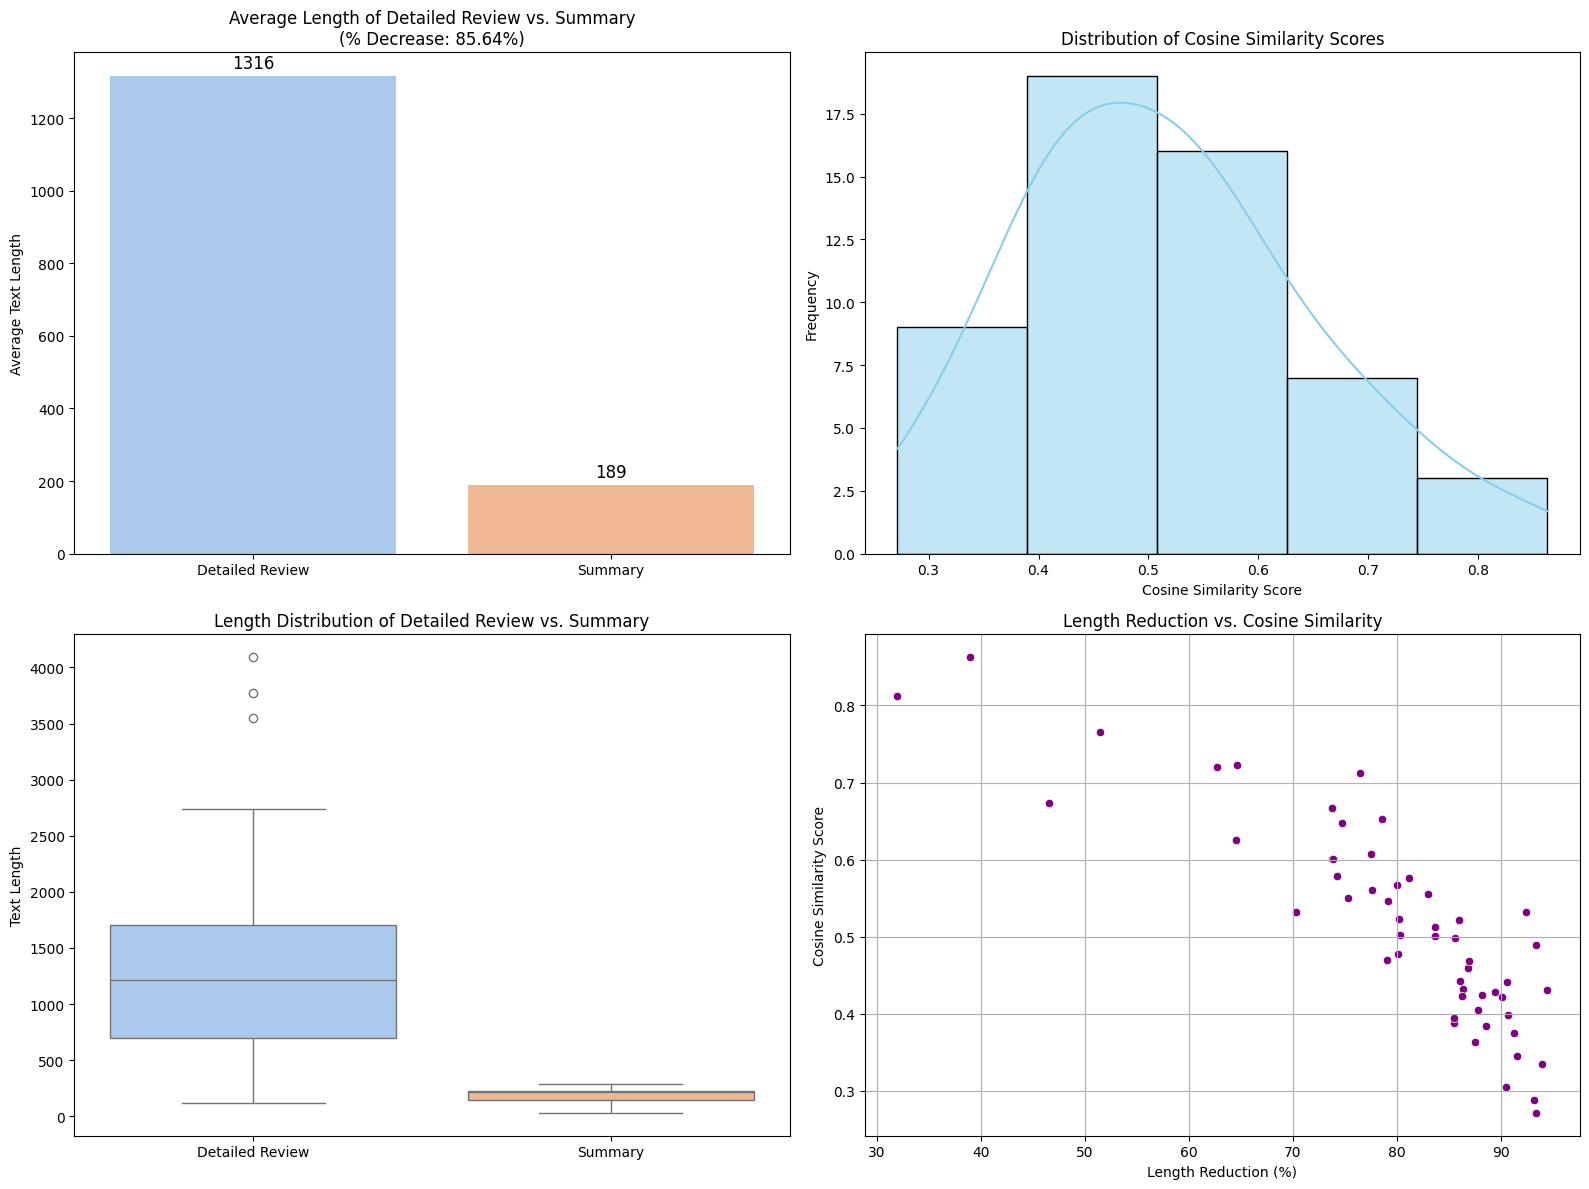

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity #To analize the differnce between the texts 

# Step 1: Text Length Comparison
result_df['detailed_length'] = result_df['detailed_review'].apply(len)
result_df['summary_length'] = result_df['summary'].apply(len)

# Calculate percentage decrease
avg_detailed_length = result_df['detailed_length'].mean()
avg_summary_length = result_df['summary_length'].mean()
percent_decrease = ((avg_detailed_length - avg_summary_length) / avg_detailed_length) * 100

# Step 2: Cosine Similarity Analysis
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(result_df['detailed_review'] + result_df['summary'])
detailed_vectors = vectorizer.transform(result_df['detailed_review'])
summary_vectors = vectorizer.transform(result_df['summary'])

cosine_similarities = [cosine_similarity(detailed_vectors[i], summary_vectors[i])[0][0] for i in range(len(result_df))]
result_df['cosine_similarity'] = cosine_similarities

# Step 3: Length Reduction Calculation
result_df['length_reduction'] = ((result_df['detailed_length'] - result_df['summary_length']) / result_df['detailed_length']) * 100

# Create subplots grid (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Bar plot for average length comparison
sns.barplot(ax=axs[0, 0], x=['Detailed Review', 'Summary'], y=[avg_detailed_length, avg_summary_length], palette='pastel')
axs[0, 0].set_title(f'Average Length of Detailed Review vs. Summary\n(% Decrease: {percent_decrease:.2f}%)')
axs[0, 0].set_ylabel('Average Text Length')
# Annotate bars
axs[0, 0].text(0, avg_detailed_length + 10, f'{avg_detailed_length:.0f}', ha='center', va='bottom', fontsize=12)
axs[0, 0].text(1, avg_summary_length + 10, f'{avg_summary_length:.0f}', ha='center', va='bottom', fontsize=12)

# Plot 2: Histogram for cosine similarity scores
sns.histplot(ax=axs[0, 1], data=result_df['cosine_similarity'], bins=5, kde=True, color='skyblue')
axs[0, 1].set_title('Distribution of Cosine Similarity Scores')
axs[0, 1].set_xlabel('Cosine Similarity Score')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Box plot for length distribution
sns.boxplot(ax=axs[1, 0], data=[result_df['detailed_length'], result_df['summary_length']], palette='pastel')
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_xticklabels(['Detailed Review', 'Summary'])
axs[1, 0].set_title('Length Distribution of Detailed Review vs. Summary')
axs[1, 0].set_ylabel('Text Length')

# Plot 4: Scatter plot of length reduction vs. cosine similarity
sns.scatterplot(ax=axs[1, 1], data=result_df, x='length_reduction', y='cosine_similarity', color='purple')
axs[1, 1].set_title('Length Reduction vs. Cosine Similarity')
axs[1, 1].set_xlabel('Length Reduction (%)')
axs[1, 1].set_ylabel('Cosine Similarity Score')
axs[1, 1].grid()

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
#Lets extract the model results to a csv for a dynamic dashboard
result_df.to_csv('bertmodel_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

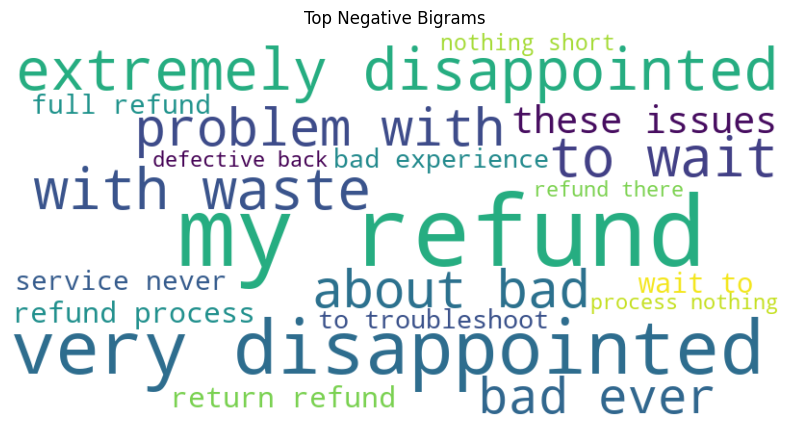

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

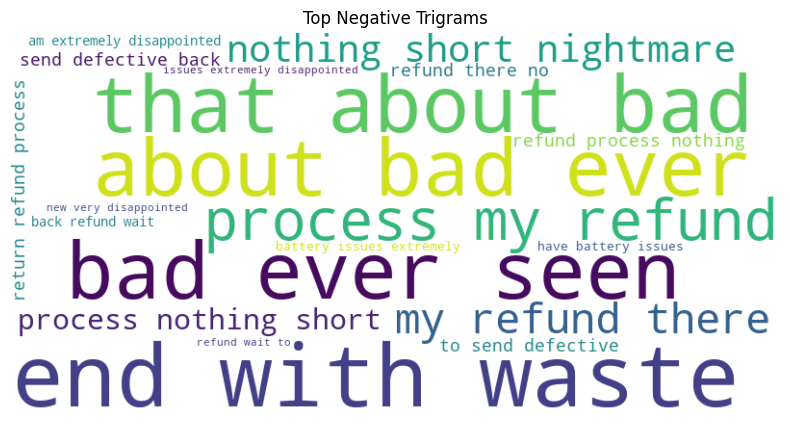

In [9]:
from wordcloud import WordCloud

# Combine the text from 'summary' and 'detailed_review' columns
text_data = result_df['summary'].fillna('') + ' ' + result_df['detailed_review'].fillna('')

#Our custom stopwords list
custom_stopwords = {
    "phone", "amazon", "purchase", "product", "seller", "item", "buy", "received",
    "get", "order", "would", "one", "use", "also", "even", "still", "could", "used",
    "really", "much", "said", "went", "got", "look", "time", "make", "take", "find",
    "they", "will", "not", "be", "the", "was", "this", "as", "been", "is", "had", "has",
    "were", "are", "it's", "did", "does", "should", "would","up",
    "of", "and", "any", "until", "for", "in", "ve", "but", "amazons", "lemon", "400"
}

# Define negative words to filter n-grams
negative_words = {"issues", "failure", "bad", "defective", "poor", "broken", "refund", "disappointed", "not", "never", "worst", "issue", "problem", "failed", "crash", "error", "trouble", "waste", "regret", "wait"}

# Helper function to extract negative n-grams using TF-IDF
def extract_negative_ngrams_tfidf(text_data, ngram_range=(2, 3), top_n=20):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, stop_words=list(custom_stopwords))
    tfidf_matrix = vectorizer.fit_transform(text_data)
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    ngrams_tfidf = dict(zip(ngram_features, tfidf_scores))

    # Filter n-grams that contain any negative words
    negative_ngrams = {ngram: score for ngram, score in ngrams_tfidf.items() if any(word in ngram for word in negative_words)}

    # Sort and return the top n negative n-grams
    sorted_negative_ngrams = sorted(negative_ngrams.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return dict(sorted_negative_ngrams)

# Extract negative bigrams and trigrams using TF-IDF
negative_bigrams_tfidf = extract_negative_ngrams_tfidf(text_data, ngram_range=(2, 2), top_n=20)
negative_trigrams_tfidf = extract_negative_ngrams_tfidf(text_data, ngram_range=(3, 3), top_n=20)

# Function to plot word clouds
def plot_wordcloud(ngrams_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for negative bigrams and trigrams using TF-IDF
plot_wordcloud(negative_bigrams_tfidf, "Top Negative Bigrams")
plot_wordcloud(negative_trigrams_tfidf, "Top Negative Trigrams")

In [11]:
#Data extraction to convert into a dynamic dashboard

bigrams_df = pd.DataFrame(list(negative_bigrams_tfidf.items()), columns=['ngram', 'frequency'])
bigrams_df['type'] = 'bigram'

trigrams_df = pd.DataFrame(list(negative_trigrams_tfidf.items()), columns=['ngram', 'frequency'])
trigrams_df['type'] = 'trigram'

# Combine bigrams and trigrams into a single DataFrame
ngrams_data = pd.concat([bigrams_df, trigrams_df], ignore_index=True)

ngrams_data.to_csv('ngrams_data.csv', index=False, encoding= 'utf-8-sig')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

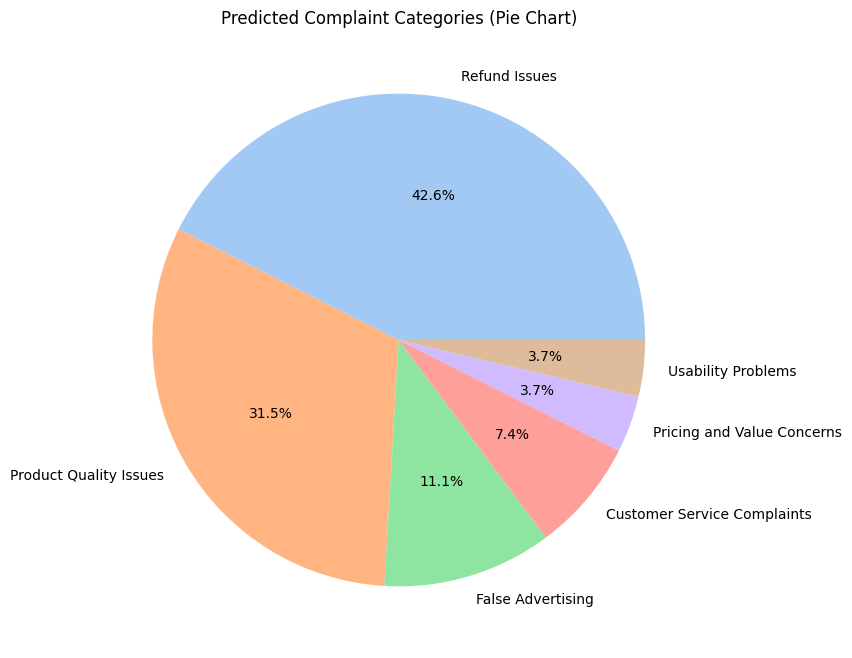

In [12]:
#Count the occurrences of each predicted label
label_counts = result_df['predicted_Label'].value_counts().reset_index()
label_counts.columns = ['predicted_Label', 'count']


#Plotting the pie chart for predicted label distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts['count'], labels=label_counts['predicted_Label'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Predicted Complaint Categories (Pie Chart)')
plt.show()

# Conclusion of the Analysis of Key Findings and Strategic Recommendations

### 1. **Prevalence of Product Quality Issues**
The most common complaint category identified was **"Product Quality Issues"**. Many customers reported defects such as:

- **Battery problems**: Quick battery drainage or failure to hold a charge.
- **Screen malfunctions**: Flickering screens, dead pixels, or unresponsive touchscreens.
- **General damages**: Cosmetic damage, loose parts, or poor overall product condition.

**Recommendation**:
- **Implement rigorous quality control measures**: Strengthen the refurbishment process by performing comprehensive diagnostic tests, focusing on critical components like batteries and screens.
- **Standardize refurbishment protocols**: Establish a consistent checklist for quality checks, ensuring that each product meets a minimum standard before being listed for sale.

#### **Impact of BART Model with Zero Shot CLassification**:
- The use of the BART summarization model allowed us to distill lengthy reviews and highlight specific product defects quickly. By extracting key phrases related to quality issues, businesses can identify recurring problems faster and take immediate corrective action.



### 2. **Significant Issues with Refunds and Returns**
A large portion of the complaints revolved around problems with **refunds and return processes**. Customers frequently mentioned:

- **Delays in processing refunds**: Extended waiting periods before receiving a refund.
- **Complicated return procedures**: Difficulty navigating the return process, leading to frustration.
- **Inconsistent return policies**: Lack of clarity or differences in return options based on the product type.

**Recommendation**:
- **Simplify the refund process**: Create a userfriendly guide for initiating returns and refunds. Ensure the process is consistent across all product categories.
- **Automate refund approvals**: Use automation tools to enhance the refund process, reducing the time it takes for customers to receive their money back, the summarizing model also helps with this.
- **Enhance transparency in communication**: Provide regular updates on the status of refund requests through email or SMS, keeping customers informed throughout the process.


#### **Impact of BART  Summarization Model**:
- By leveraging the BART model, we were able to identify and summarize complaints specifically mentioning refund issues. This automated summarization helps streamline the process by bringing attention to common refund problems, enabling faster resolution and improved customer experience.



### **3. Issues with False Advertising**

The analysis uncovered significant dissatisfaction related to **false advertising**, where customers reported discrepancies between the product description and the actual item received. Key issues highlighted in the feedback include:

- **Misleading product descriptions**: Customers felt that the condition of the refurbished products was inaccurately represented, often described as "like new" but arriving with noticeable wear and tear.
- **Inaccurate specifications**: Complaints frequently mentioned discrepancies in features, such as missing accessories or incorrect product details (e.g., storage capacity or model).
- **Unmet expectations**: Customers experienced frustration when the received product did not match the advertised quality, leading to a sense of mistrust and disappointment.

**Recommendation**:
- **Improve accuracy of product listings**: Ensure that all product descriptions are clear and reflect the true condition of the refurbished item, including any cosmetic defects or signs of use.
- **Include detailed photos and condition grading**: Provide high-quality images and a standardized grading system to set realistic expectations for buyrs
- **Strengthen quality checks before listing**: Verify product specifications and condition during the refurbishment process to minimize discrepancies and enhance customer satisfaction.

This shift in focus highlights the importance of transparency and accuracy in product advertising, addressing a critical pain point for customers and building trust in the refurbished market.



### **Conclusion and Strategic Impact**
By addressing these three core areas—**Product Quality Issues**, **Refunds and Returns**, and **Customer Service Complaints**—businesses can significantly enhance the overall customer experience in the refurbished market. These recommendations, if implemented, will help:

- **Boost customer trust** by reducing defects and improving transparency.
- **Lower return rates**, saving costs associated with handling returns and refunds.
- **Strengthen brand reputation** through efficient customer support and a seamless refund experience.

Focusing on these strategic improvements will not only position businesses as leaders in the rapidly expanding refurbished market but also demonstrate a strong commitment to environmental responsibility. 
By prioritizing quality control, streamlining the refund process, and elevating customer support, companies can build a loyal, satisfied customer base that trusts the value of refurbished products. This approach fosters a more sustainable purchasing ecosystem, reducing electronic waste and contributing to a circular economy where products are reused and resources are conserved. Embracing these practices will pave the way for a future where economic growth and environmental stewardship go hand in hand, creating a positive impact for both customers and the planet.
